### Importando las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
import plotly.express as px #bigotes
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
#importar librería para SMOTE
import imblearn


### Cargando el dataset como csv




In [ ]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data.csv']),delimiter=",")

Saving HCV-Egy-Data.csv to HCV-Egy-Data.csv


### Generando las copias de los dataframe

In [ ]:
dataframecopia=dataframe
dataframecopia2=dataframe
## dataframecopia

### Ahora se aplica SMOTE Y MSV

In [ ]:
from imblearn.over_sampling import SMOTE
y=dataframecopia['Baselinehistological staging']
x=dataframecopia.drop(['Baselinehistological staging','Baseline histological Grading'],axis=1)

num_rep=4
datasets_equilibrados=[]
for i in range(2**num_rep):
  smote = SMOTE(random_state=i)
  x_resampled, y_resampled= smote.fit_resample(x,y)
  datasets_equilibrados.append({'x':x_resampled , 'y':y_resampled})

x_combinados= pd.concat([data['x'] for data in datasets_equilibrados], axis=0)
y_combinados= pd.concat([data['y'] for data in datasets_equilibrados], axis=0)
XTrain,XTest,yTrain,yTest=train_test_split(x_combinados,y_combinados,test_size=0.2,random_state=6)
#'poly', 'rbf', 'precomputed', 'linear', 'sigmoid'
modelo=SVC(kernel='rbf',decision_function_shape='ovr',degree=27,gamma='auto',random_state=27)
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Las predicciones son ")
print(yPredict)
print("Se esperaba ")
print(yTest)
print("Accuracy=",metrics.accuracy_score(yTest,yPredict))


Las predicciones son 
[4 4 3 ... 4 2 4]
Se esperaba 
1067    4
1143    4
317     3
531     2
65      4
       ..
163     3
1069    2
743     4
154     2
327     4
Name: Baselinehistological staging, Length: 4634, dtype: int64
Accuracy= 0.9782045748813121


### Matriz de confusion

[[1048   78    0    0]
 [   0 1173    0    0]
 [   0   23 1147    0]
 [   0    0    0 1165]]
Especificidad F1: 0.9307282415630551
Especificidad F2 1.0
Especificidad F3: 0.9803418803418803
Especificidad F4: 1.0


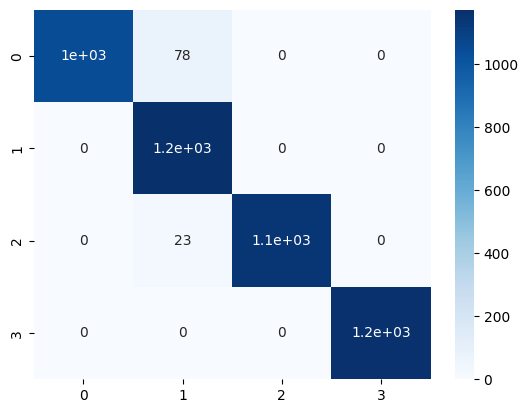

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Metricas de la MSV

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas, zero_division=False))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       1.00      0.93      0.96      1126
          F2       0.92      1.00      0.96      1173
          F3       1.00      0.98      0.99      1170
          F4       1.00      1.00      1.00      1165

    accuracy                           0.98      4634
   macro avg       0.98      0.98      0.98      4634
weighted avg       0.98      0.98      0.98      4634

Accuracy= 0.9782045748813121


### Corriendo el modelo eliminado las variables que no tienen en cuenta en la OMS

In [ ]:
dataframecopia2.dropna()
y=dataframecopia2['Baselinehistological staging']
x=dataframecopia2.drop(['Age ','BMI','WBC', 'RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baselinehistological staging','Baseline histological Grading'],axis=1)

num_rep=4
datasets_equilibrados=[]
for i in range(2**num_rep):
  smote = SMOTE(random_state=i)
  x_resampled, y_resampled= smote.fit_resample(x,y)
  datasets_equilibrados.append({'x':x_resampled , 'y':y_resampled})

x_combinados= pd.concat([data['x'] for data in datasets_equilibrados], axis=0)
y_combinados= pd.concat([data['y'] for data in datasets_equilibrados], axis=0)
XTrain,XTest,yTrain,yTest=train_test_split(x_combinados,y_combinados,test_size=0.2,random_state=6)
x=dataframecopia2
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=6)
modelo=SVC(kernel='rbf',decision_function_shape='ovr',degree=27,gamma='auto',random_state=27)
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Las predicciones son ")
print(yPredict)
print("Se esperaba ")
print(yTest)
print("Accuracy=",metrics.accuracy_score(yTest,yPredict))



Las predicciones son 
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Se esperaba 
584     4
268     2
264     4
732     4
670     4
       ..
1285    4
1034    2
85      2
1129    4
465     1
Name: Baselinehistological staging, Length: 277, dtype: int64
Accuracy= 0.26714801444043323


### Matriz de confusión con solo las variables de la OMS

[[ 0  0  0 79]
 [ 0  0  0 56]
 [ 0  0  0 68]
 [ 0  0  0 74]]
Especificidad F1: 0.0
Especificidad F2 0.0
Especificidad F3: 0.0
Especificidad F4: 1.0


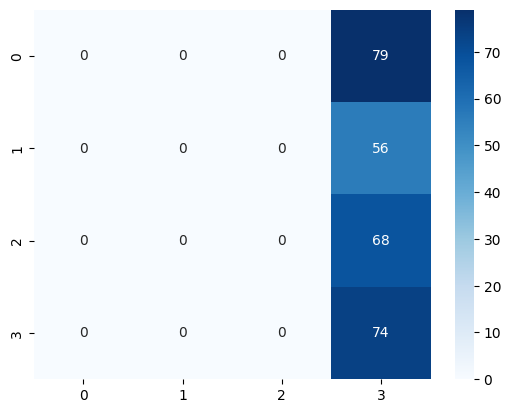

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Métricas del modelos solo con los campos de la OMS

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas, zero_division=False ))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       0.00      0.00      0.00        79
          F2       0.00      0.00      0.00        56
          F3       0.00      0.00      0.00        68
          F4       0.27      1.00      0.42        74

    accuracy                           0.27       277
   macro avg       0.07      0.25      0.11       277
weighted avg       0.07      0.27      0.11       277

Accuracy= 0.26714801444043323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
